# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, simulations, unit_conversions, and tanksim</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [1]:
from simulations import simulations as sim
import matplotlib.pyplot as plt
import numpy as np
import tanksim
from tankTotalMass.for_redistribution_files_only import setup as tankTotalMass

In [2]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,altitude)
    ax1.set_ylabel('Altitude (ft)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,velocity)
    ax2.set_ylabel('Velocity (ft/s)')

    # plot acceleration
    gees = [x/g0Imp for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (lbf)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (lbf)')
    ax1.set_ylim(0,2e5)

In [3]:
unit = sim.unit()

burntime = 60 # s

nengines = 1
thrust_sl = 5000  # lbf
Isp = 260 #s
mdot = nengines*thrust_sl/(Isp) #lbm/s
twratio = 50  # estimated thrust 2 weight ratio
mixtureratio = 2.23
g0Metric = 9.81 #m/s^2
g0Imp = 32.17 #ft/s^2

mstructure = 379  # lbm
mavionics = 21.4  # lbm
msystems = 67.8 # lbm
mmisc = 25 #lbm
#mengine = thrust_sl*nengines/twratio #lbm
mpropulsion = 55 # lbm
mpropellant = mdot*burntime


diameter = 12 #in

mRP1 = mpropellant / (mixtureratio + 1)
mLOx = mpropellant - mRP1

tankpressure = 750 #psi
fos = 4
pressurantdiameter = diameter - 2 #in
HEinitialpressure = 4500 #psi
HEfinalpressure = 50 #psi



tank = tanksim.tank(diameter,tankpressure,fos,pressurantdiameter,HEinitialpressure,HEfinalpressure,mLOx,mRP1)
tankSpecs = tank.tankCalc()
mtank = 174.81 #tankSpecs['tank_mass'] #lbm

if diameter == 8:
    refArea = .345 #ft^2
elif diameter == 15:
    refArea = 1.227 #ft^2
elif diameter == 12:
    refArea = .785 #ft^2
else:
    refArea = .538 #ft^2
#reference area of .538 for 10" rocket, .345 for 8" rocket, 1.227 for 15" rocket, .785 for 12" rocket

m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f lbm' % mpropellant)
print('Propulsion Mass = %.2f lbm' % mpropulsion)
print('Tank Mass = %.2f lbm' % mtank)
print('Structural Mass (inc. Tank) = %.2f lbm' % (mstructure + mtank))
print('Systems Mass = %.2f lbm' % msystems)
print('Misc Mass = %.2f lbm' % mmisc)
print('Avionics Mass = %.2f lbm' % mavionics)
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f lbm' % (m0))
print('Total Dry Mass: %.2f lbm' % (m0-mpropellant))
print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d lbf' % (thrust_sl*nengines))
print('Isp = %d s' % Isp)
print('mdot = %.2f lbm/s' % mdot)
print('Total Impulse = %i lbf-s' % (thrust_sl*burntime*nengines))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 0,
    'mass': unit.lbmToSlug(m0),
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 2.690978,
    'nengines': nengines
}


### STRUCTURAL PARAMETERS ###
Propellant Mass = 1153.85 lbm
Propulsion Mass = 55.00 lbm
Tank Mass = 174.81 lbm
Structural Mass (inc. Tank) = 553.81 lbm
Systems Mass = 67.80 lbm
Misc Mass = 25.00 lbm
Avionics Mass = 21.40 lbm
Mass Propellant Ratio (Mprop/M0) 0.61
Total Wet Mass: 1876.86 lbm
Total Dry Mass: 723.01 lbm

### ENGINE PARAMETERS ###
Thrust = 5000 lbf
Isp = 260 s
mdot = 19.23 lbm/s
Total Impulse = 300000 lbf-s

### OTHER IMPORTANT THINGS ###
Burn Time = 60.00 s


In [4]:
itsatest = sim.Rocket(initialConditions, engines, burntime)
altitude, velocity, acceleration, mass, time, thrust, drag, Q, rho, temperature = itsatest.run()

Apogee = 619524 ft
Apogee = 188 km
Max Velocity = 5520.13 ft/s
Max Acceleration = 5.98 gees
Max Q = 12.05 psi
Max Drag = 1021.21 lbf


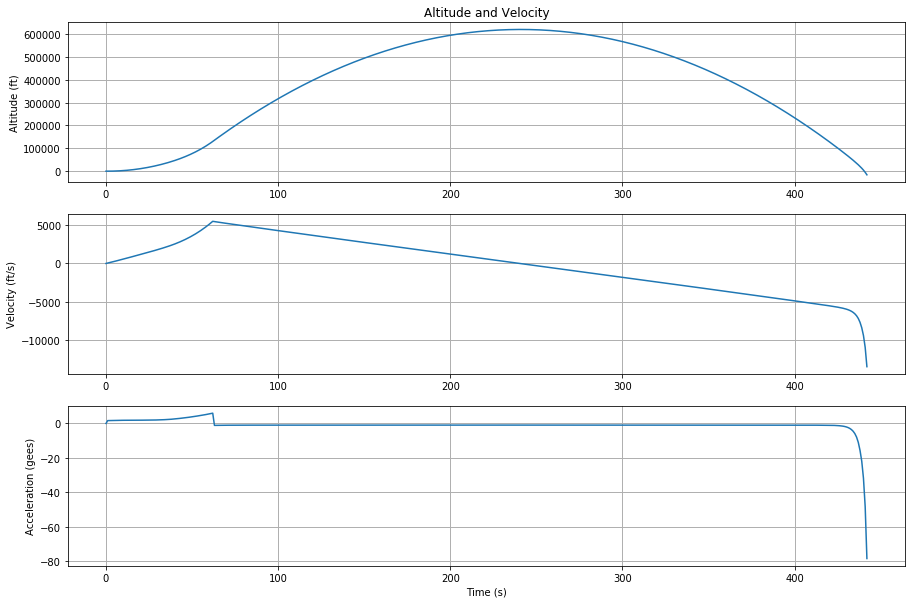

In [5]:
kmaltitude = [unit.ftToM(x)/1000 for x in altitude]
QPsi = [unit.psfToPsi(x) for x in Q]

print('Apogee = %d ft' % max(altitude))
print('Apogee = %d km' % max(kmaltitude))
print('Max Velocity = %.2f ft/s' % max(velocity))
gees = [a/g0Imp for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))
print('Max Q = %.2f psi' % max(QPsi))
Drag = drag[0:len(Q)]
print('Max Drag = %.2f lbf' % max(Drag))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

In [6]:
def maxAndTime(list):
    max = 0
    time = 0
    for i in range(len(Q)):
        if list[i] > max:
            max = list[i]
            time = i
    return (max,time)

maxQ, maxQTime = maxAndTime(QPsi)
print("Max Q = %.2f psi" % maxQ)
print("Time of max Q = %d s" % maxQTime)
print("Altitude at max Q = %.2f ft" % altitude[maxQTime])
print("Velocity at max Q = %.2f ft/s" % velocity[maxQTime])
print("Air density at max Q = %.7f slug/ft^3" % rho[maxQTime])

print()

maxV, maxVTime = maxAndTime(velocity[0:len(Q)])
print("Max velocity = %.2f ft/s" % maxV)
print("Time of max velocity = %d s" % maxVTime)
print("Altitude at max velocity = %.2f ft" % altitude[maxVTime])
print("Q at max velocity = %.2f psi" % QPsi[maxVTime])
print("Air density at max velocity = %.7f slug/ft^3" % rho[maxVTime])

print("Height at burnout = %.2f ft" % altitude[burntime])

Max Q = 12.05 psi
Time of max Q = 33 s
Altitude at max Q = 31173.07 ft
Velocity at max Q = 2016.48 ft/s
Air density at max Q = 0.0009151 slug/ft^3

Max velocity = 5520.13 ft/s
Time of max velocity = 62 s
Altitude at max velocity = 129862.19 ft
Q at max velocity = 1.00 psi
Air density at max velocity = 0.0000101 slug/ft^3
Height at burnout = 119391.90 ft


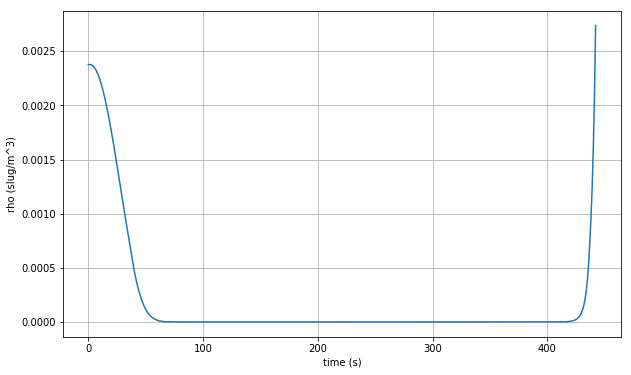

In [7]:
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
maltitude = [unit.ftToM(x) for x in altitude]
mvelocity = [unit.ftToM(v) for v in velocity]
ax11.plot(time,rho)
ax11.set_title('')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('rho (slug/m^3)')
ax11.grid()
plt.show()